In [ ]:
#Função de treinamento do ADALINE
def treina_adaline(W, b, X, yd_p, alfa, maxepocas, tol):
  epoca = 1 #Inicia a contagem de épocas, a variável é um contador que incrementa até o número máximo de épocas
  N = X.shape[1] #Determina a quantidade de amostras a serem treinadas baseado no número de colunas de X
  print(f'N={N}')
  SEQ = tol #Inicializa a soma dos erros quadrados com o valor de tolerância
  vetor_seq = [] #Lista para armazenar a soma dos erros quadrados de cada época
  while ((epoca <= maxepocas) and (SEQ >= tol)): #O treinamento continua até que o erro esteja abaixo da tolerância ou até atingir o número máximo de épocas
    SEQ = 0 #Zera a soma dos erros quadrados no início de cada época
    for i in range(0, N):
      y = yadaline(W, b, X[:,[i]])  #Calcula a saída do adaline, retornando para y apenas um valor
      erro = yd_p[0, i] -y  #Calcula o erro da saída atual em relação à saída desejada. Esse erro é usado para ajustar os pesos usando a regra delta
      W = W + alfa*erro*X[:,i].T  #o ajuste é a taxa de aprendizado alfa vezes o erro calculado, multiplicado pela amostra que gerou o erro. É preciso fazer o transposto para que o cálculo aconteça
      b = b + alfa*erro  #Ajusta o bias usando a regra delta
      SEQ = SEQ + erro[0]**2  #Acumula o erro quadrado para esta amostra. FIM DO FOR
      ### IDEAL CHAMAR A FUNÇÃO MISTURA AQUI ###
    print(f'SEQ = {SEQ[0]}') #Exibe o erro quadrado acumulado para esta época
    epoca = epoca + 1 #Avança para a próxima época
    vetor_seq.append(SEQ[0]) #Armazena o erro quadrado acumulado desta época. Fim do WHILE
  return W, b, vetor_seq

In [ ]:
#Função Mistura
def mistura(X, yd):
# Garante que X e yd são arrays unidimensionais e cria um array bidimensional temporário
  assert len(X) == len(yd)
  p = np.random.permutation(len(X))
  xp,yp = X[p], yd[p]

  return xp,yp

In [1]:
#Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## DECLARAÇÃO DAS FUNÇÕES
#Função de cálculo do ADALINE
def yadaline(W, b, X):
   y = np.dot(W, X) + b
   return y

# Função de treinamento do Adaline
def treina_adaline(W,b,X,yd,alfa,maxepocas,tol):
  epoca = 1
  N = X.shape[1] # Número de amostras na matriz de dados
  print(f'N = {N}')
  SEQ = tol # Declaração necessária para ultrapassar primeira validação do loop while abaixo
  vetor_seq = []
  while (epoca <= maxepocas and SEQ >= tol):
    SEQ = 0
    for i in range(0,N):
      y = yadaline(W,b,X[:,i])
      erro = yd[0,i] - y
      # Regra delta/Gradiente descendente
      W = W + alfa * erro * X[:,i].T # Calcular novos pesos W
      b = b + alfa * erro # Calcular novo bias
      SEQ = SEQ + erro[0]**2 # Somatório dos erros quadráticos
    print(f'SEQ = {SEQ[0]} na Epoca {epoca}')
    epoca = epoca + 1
    vetor_seq.append(SEQ[0])
  return [W,b,vetor_seq]

def mistura(X,yd):
  p = np.random.permutation(len(X))
  xp,yp = X[p], yd[p]
  return xp,yp


In [3]:
#Criação dos dados X e yd SEM RUÍDO
X = np.linspace(0, 5, 80)
print(f' X= {X}\n')
yd = 5*X + 10
print(f'yd= {yd}\n')


 X= [0.         0.06329114 0.12658228 0.18987342 0.25316456 0.3164557
 0.37974684 0.44303797 0.50632911 0.56962025 0.63291139 0.69620253
 0.75949367 0.82278481 0.88607595 0.94936709 1.01265823 1.07594937
 1.13924051 1.20253165 1.26582278 1.32911392 1.39240506 1.4556962
 1.51898734 1.58227848 1.64556962 1.70886076 1.7721519  1.83544304
 1.89873418 1.96202532 2.02531646 2.08860759 2.15189873 2.21518987
 2.27848101 2.34177215 2.40506329 2.46835443 2.53164557 2.59493671
 2.65822785 2.72151899 2.78481013 2.84810127 2.91139241 2.97468354
 3.03797468 3.10126582 3.16455696 3.2278481  3.29113924 3.35443038
 3.41772152 3.48101266 3.5443038  3.60759494 3.67088608 3.73417722
 3.79746835 3.86075949 3.92405063 3.98734177 4.05063291 4.11392405
 4.17721519 4.24050633 4.30379747 4.36708861 4.43037975 4.49367089
 4.55696203 4.62025316 4.6835443  4.74683544 4.81012658 4.87341772
 4.93670886 5.        ]

yd= [10.         10.3164557  10.63291139 10.94936709 11.26582278 11.58227848
 11.89873418 12.21518987 

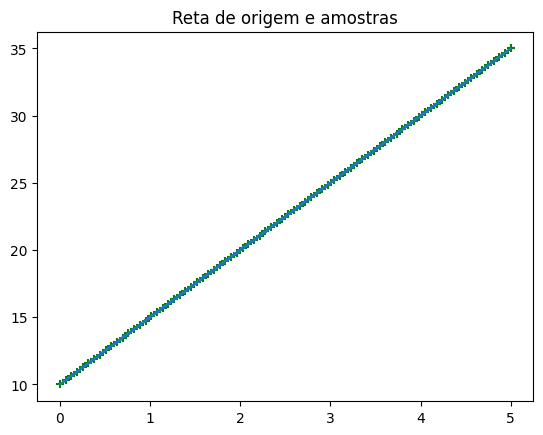

In [4]:
#Chamada da função mistura
X,yd = mistura(X,yd)

#Plota reta de origem e amostras
plt.figure()
plt.scatter(X, yd, marker = '+', color = 'green')
plt.title('Reta de origem e amostras')
plt.plot(X,yd)
plt.show()


In [5]:
## DECLARAÇÃO DAS VARIÁVEIS
alfa = 0.0001 # O valor de alfa dita o passo de ajuste dos pesos
# 7200 epocas é o valor ótimo, mas o ganho incremental a partir de 1000 epocas é mínimo
maxepocas = 7200
tol = 1*10**-9 # tol é a tolerancia máxima estabelecida para o erro no treinamento

W = (np.array(np.random.rand(1 , 1))*2)-1 # Criar variável W com os pesos randômicos entre -1 e 1 (*2-1 é a operação para mover o range do rand de 0 a 1 para -1 a 1)
b = (np.array(np.random.rand(1 , 1))*2)-1 # A variável b é o bias, que tem o objetivo variar a influência das entradas

#vetor_seq = []

X_T = yd[np.newaxis]
yd_T = yd[np.newaxis]


In [6]:
#Inicia o treinamento do ADALINE com os dados fornecidos

W, b, vetor_seq = treina_adaline(W, b, X_T, yd_T, alfa, maxepocas, tol)
print(f'Pesos após o treinamento : W = {W}, b = {b}')  #Exibe os pesos e bias finais após o treinamento

A saída de streaming foi truncada nas últimas 5000 linhas.
SEQ = 0.21094942615337137 na Epoca 2202
SEQ = 0.21062329713323857 na Epoca 2203
SEQ = 0.21029767231043525 na Epoca 2204
SEQ = 0.20997255090546743 na Epoca 2205
SEQ = 0.20964793214005628 na Epoca 2206
SEQ = 0.20932381523711455 na Epoca 2207
SEQ = 0.20900019942075787 na Epoca 2208
SEQ = 0.2086770839163101 na Epoca 2209
SEQ = 0.20835446795027462 na Epoca 2210
SEQ = 0.20803235075037402 na Epoca 2211
SEQ = 0.20771073154550046 na Epoca 2212
SEQ = 0.20738960956576977 na Epoca 2213
SEQ = 0.2070689840424455 na Epoca 2214
SEQ = 0.2067488542080248 na Epoca 2215
SEQ = 0.20642921929615846 na Epoca 2216
SEQ = 0.20611007854169372 na Epoca 2217
SEQ = 0.2057914311806562 na Epoca 2218
SEQ = 0.20547327645026697 na Epoca 2219
SEQ = 0.20515561358891218 na Epoca 2220
SEQ = 0.20483844183616676 na Epoca 2221
SEQ = 0.20452176043275272 na Epoca 2222
SEQ = 0.20420556862061154 na Epoca 2223
SEQ = 0.20388986564281658 na Epoca 2224
SEQ = 0.20357465074363043

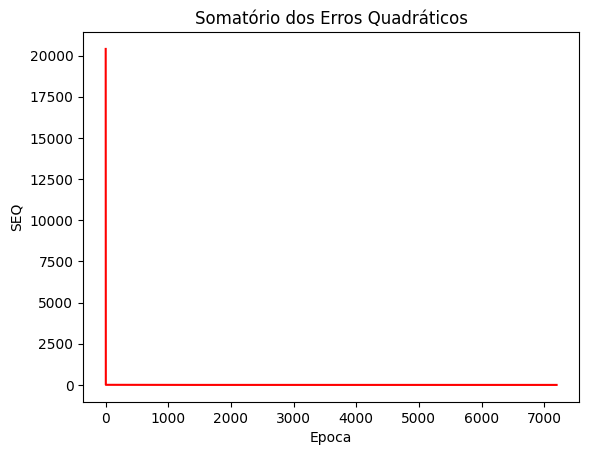

In [7]:
## Plota SEQ
plt.plot(vetor_seq,'r-')
plt.xlabel('Epoca')
plt.ylabel('SEQ')
plt.title('Somatório dos Erros Quadráticos')
plt.show()

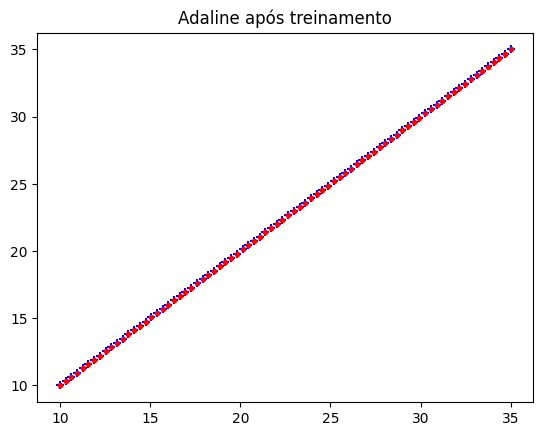

In [ ]:
#Testa ADALINE treinado

y = yadaline(W,b,X_T)
plt.figure()
plt.scatter(X_T, yd_T, marker='+', color='blue') # Dados de treinamento
plt.plot(X_T,y,"r.") # Dados de teste
plt.title('Adaline após treinamento')
plt.show()



## **Dados com Ruído**

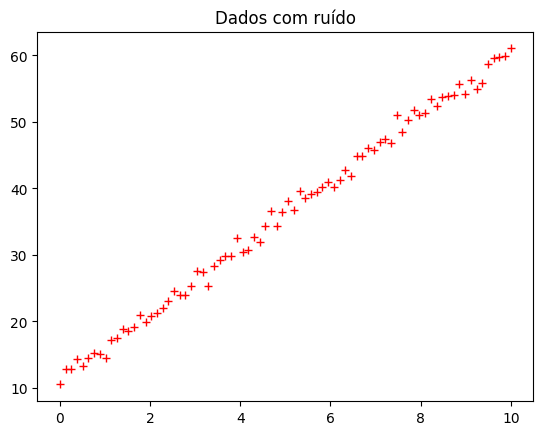

In [21]:
X = np.linspace(0, 10, 80)
yd = 5*X + 10

# Parâmetros do ruído
avg_ruido = 1
std_deviation_ruido = 1
# Gera ruído
ruido = np.random.normal(avg_ruido, std_deviation_ruido, yd.shape)

yd = yd + ruido

X, yd = mistura(X,yd)

plt.figure()
plt.title('Dados com ruído')
plt.plot(X,yd,'+',c='r')
plt.show()


In [22]:
# Definir variáveis
alfa = 0.001
maxepocas = 10
tol = 0.000001

W = (np.array(np.random.rand(1 , 1))*2)-1
b = np.array([[1]])

vetor_seq = []

X_T = X.T[np.newaxis]
yd_T = yd[np.newaxis]

In [23]:
# Treinar dados com ruídos
W, b, vetor_seq = treina_adaline(W, b, X_T, yd_T, alfa, maxepocas, tol)
print(f'Pesos após o treinamento : W = {W}, b = {b}')

N = 80
SEQ = 21129.673609710306 na Epoca 1
SEQ = 1844.4150908975616 na Epoca 2
SEQ = 1712.213591302921 na Epoca 3
SEQ = 1647.7374963828859 na Epoca 4
SEQ = 1585.9352965037813 na Epoca 5
SEQ = 1526.5586678833613 na Epoca 6
SEQ = 1469.516235577986 na Epoca 7
SEQ = 1414.7165074764662 na Epoca 8
SEQ = 1362.071317557955 na Epoca 9
SEQ = 1311.4959499146764 na Epoca 10
Pesos após o treinamento : W = [[6.11565128]], b = [[3.61733309]]


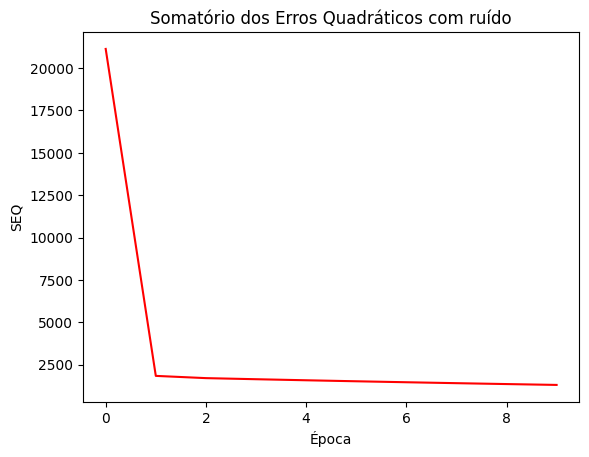

In [24]:
#Plotar o Somatório dos Erros Quadráticos (SEQ) ao longo das épocas
plt.plot(vetor_seq, 'r-')
plt.xlabel('Época')
plt.ylabel('SEQ')
plt.title('Somatório dos Erros Quadráticos com ruído')
plt.show()

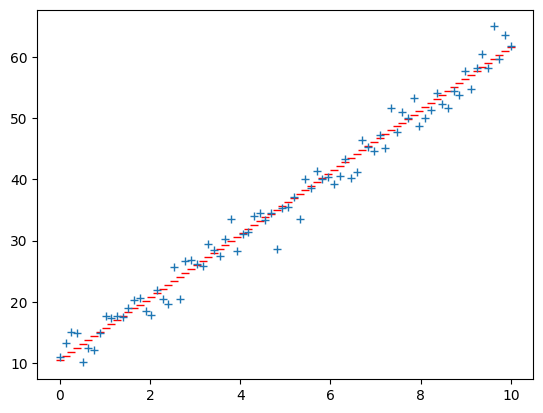

In [ ]:
#Testar o Adaline treinado

y = yadaline(W,b,X_T)

plt.figure()
plt.plot(X_T,y,"r_")
plt.plot(X,yd,"+")
plt.show()